# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 11

**Feb 26, 11:59pm: See the [Calendar](https://github.com/UBC-CS/cpsc330-2023W2/tree/main?tab=readme-ov-file#deliverable-due-dates-tentative).**

## Submission instructions <a name="si"></a>
<hr>

_points: 4_

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4.
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W2/blob/main/docs/homework_instructions.md).

## Imports

In [1]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours". Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

_points: 3_

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

This is a binary classification problem, the target is default.payment.next.month. 

In [2]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv", index_col=0)
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

_points: 2_

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=76`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [3]:
train_df = None
test_df = None

train_df, test_df = train_test_split(credit_df, test_size=0.6, random_state=123)

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

_points: 10_

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Overall people pay the bill in time given that there are much more people pay in time. From the information below, I can know that there are no missing values. And from the visualization below, most features contribute to the categorization_

In [4]:
train_df.sort_index()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
6,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
7,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,100000.0,1,1,2,38,0,-1,-1,0,0,...,70626.0,69473.0,55004.0,2000.0,111784.0,4000.0,3000.0,2000.0,2000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 1151 to 19967
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   12000 non-null  float64
 1   SEX                         12000 non-null  int64  
 2   EDUCATION                   12000 non-null  int64  
 3   MARRIAGE                    12000 non-null  int64  
 4   AGE                         12000 non-null  int64  
 5   PAY_0                       12000 non-null  int64  
 6   PAY_2                       12000 non-null  int64  
 7   PAY_3                       12000 non-null  int64  
 8   PAY_4                       12000 non-null  int64  
 9   PAY_5                       12000 non-null  int64  
 10  PAY_6                       12000 non-null  int64  
 11  BILL_AMT1                   12000 non-null  float64
 12  BILL_AMT2                   12000 non-null  float64
 13  BILL_AMT3                   12000

In [6]:
credit_summary=train_df.describe(include="all")

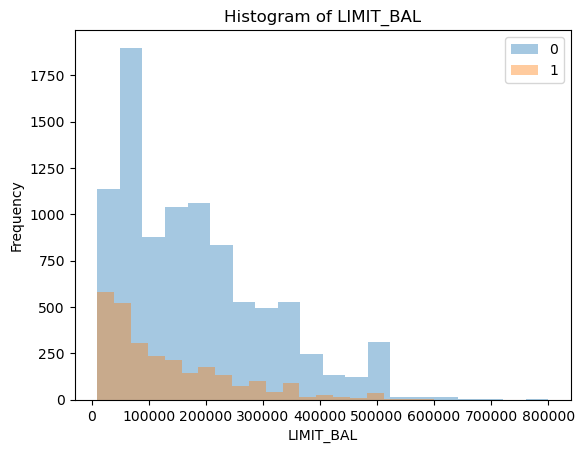

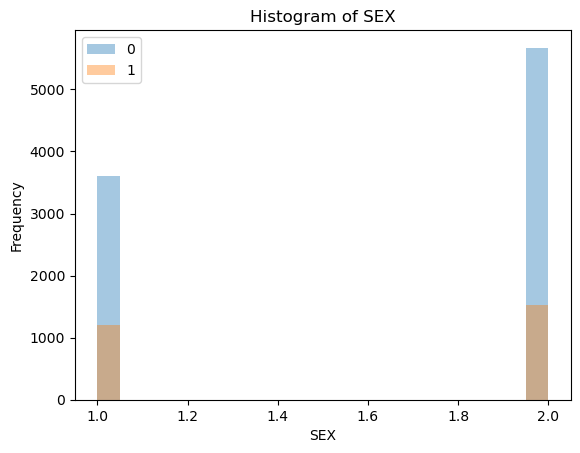

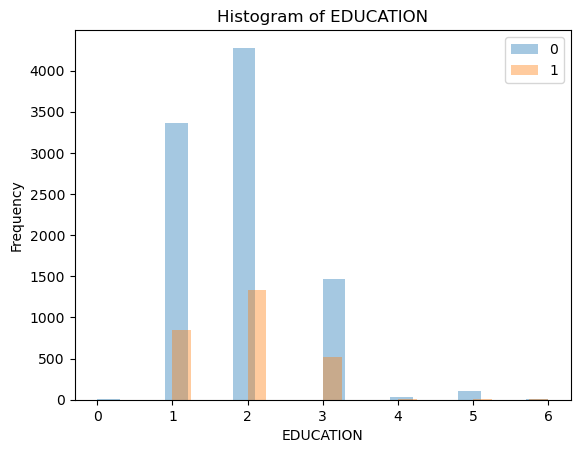

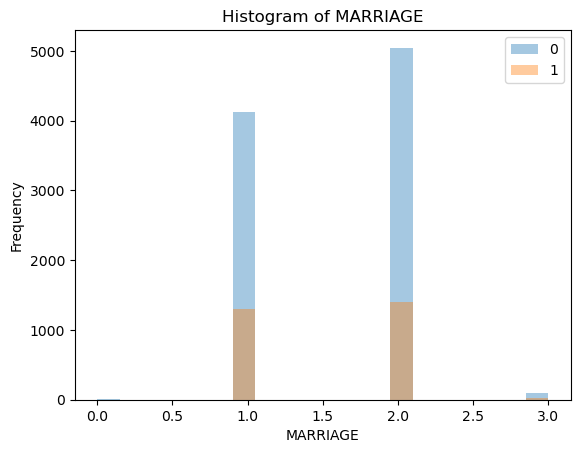

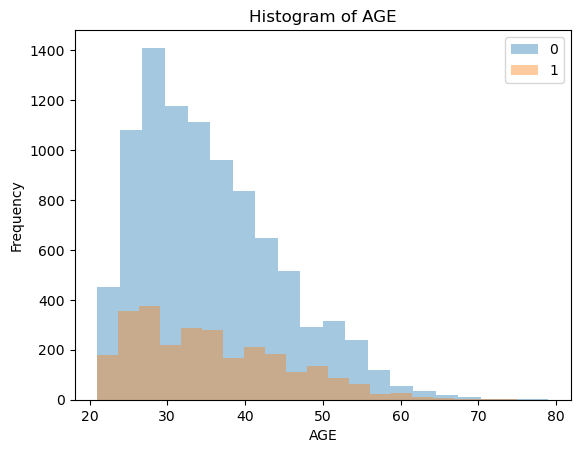

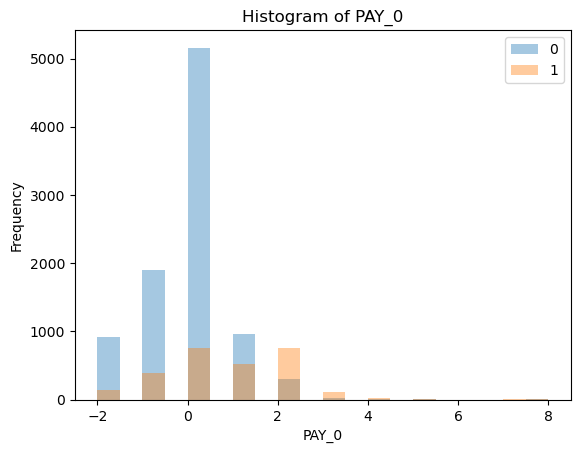

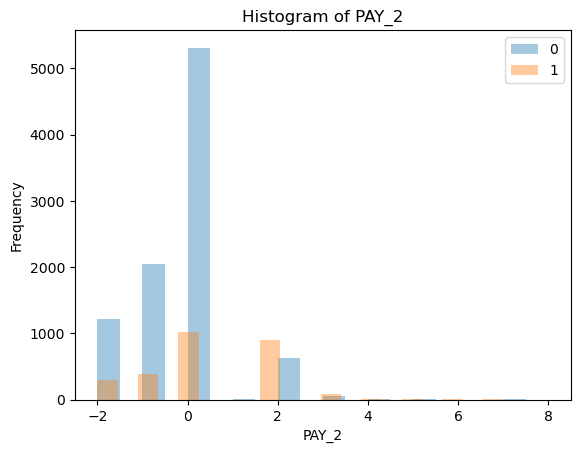

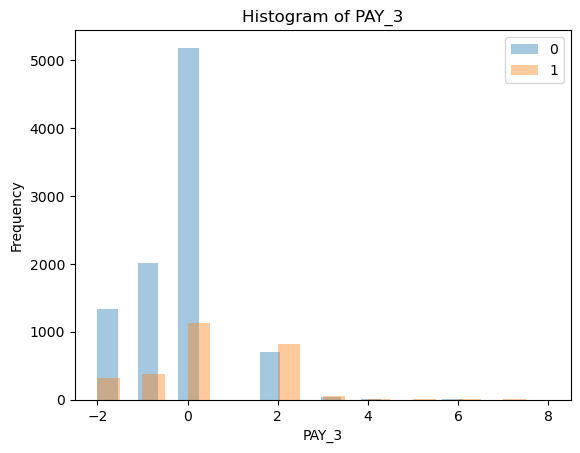

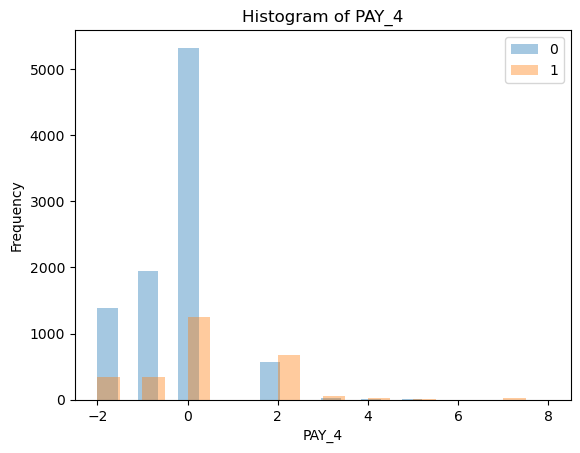

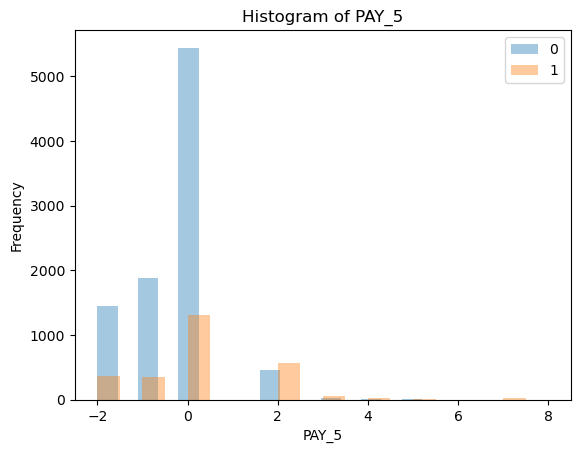

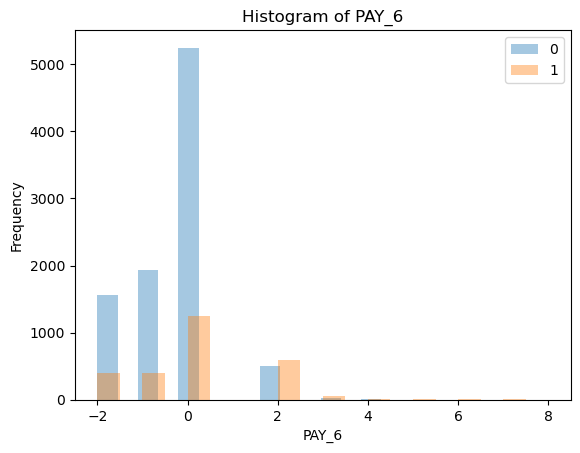

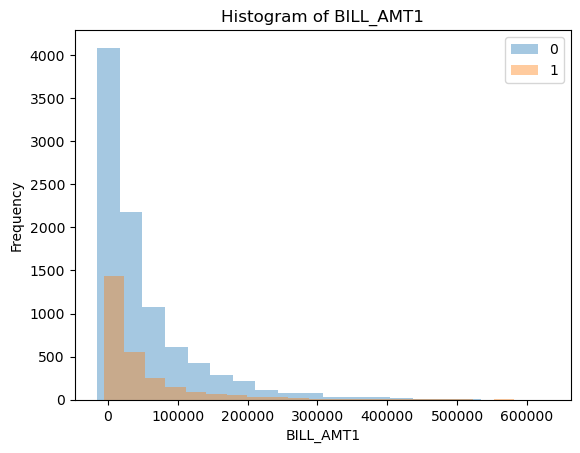

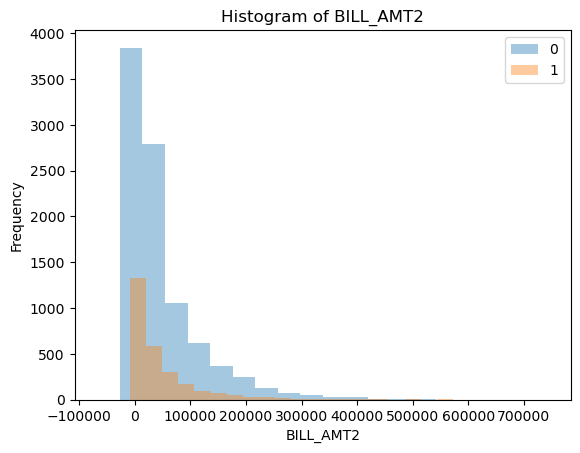

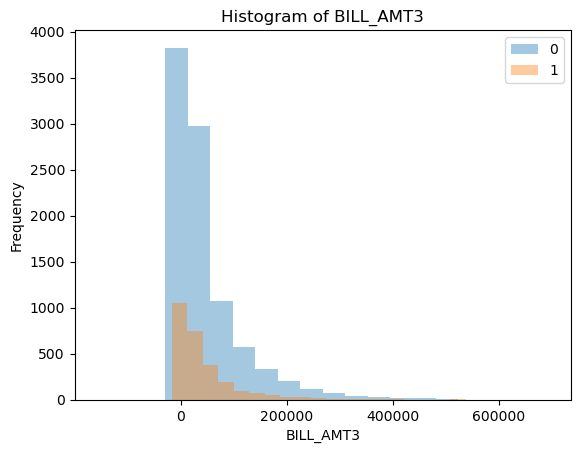

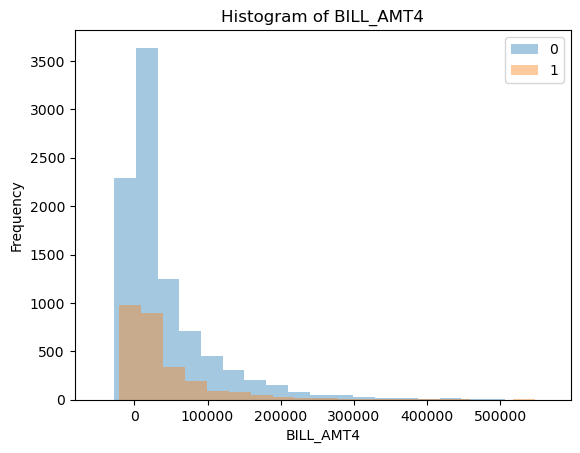

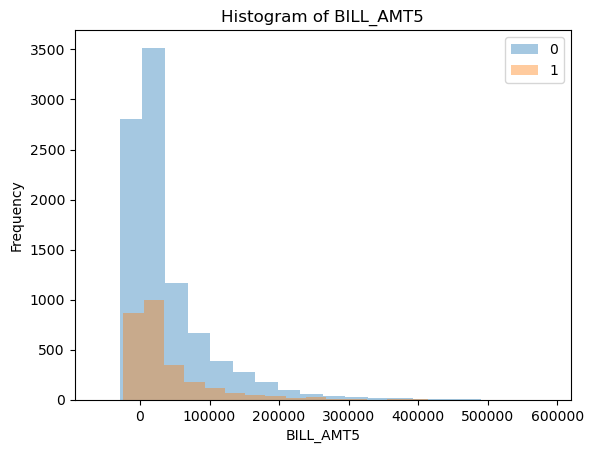

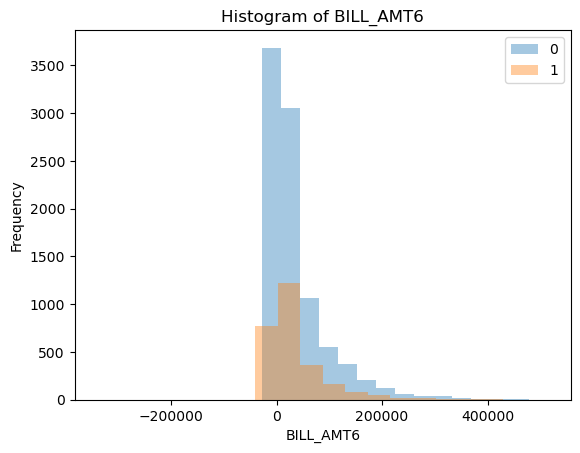

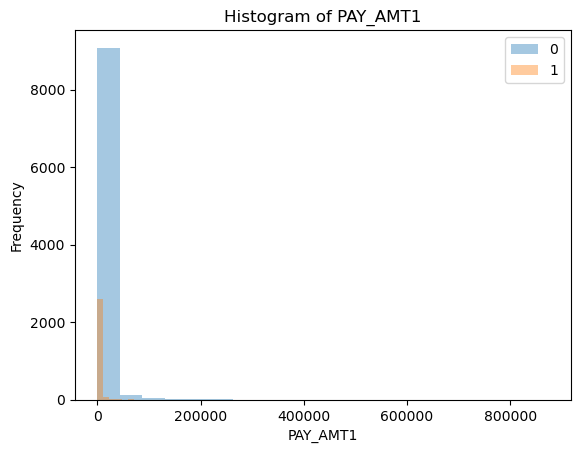

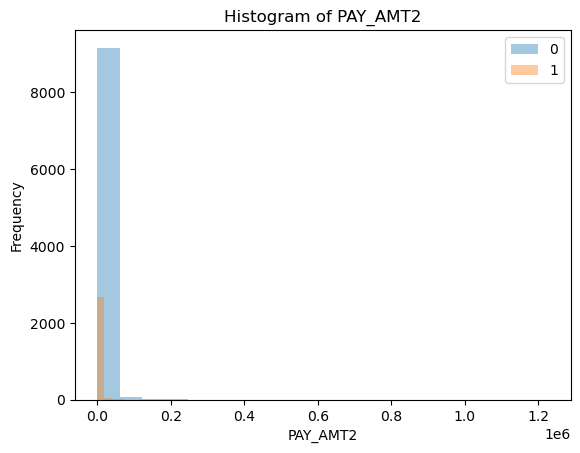

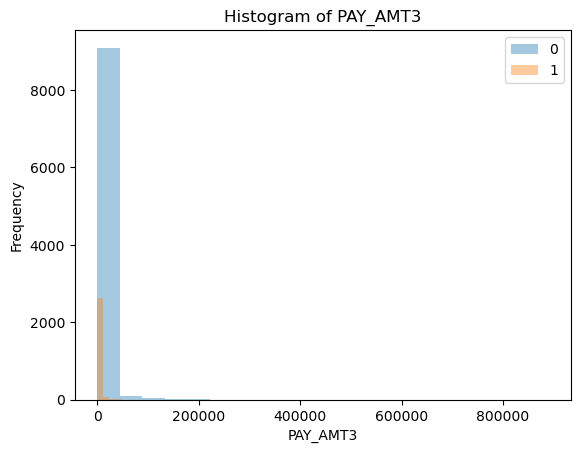

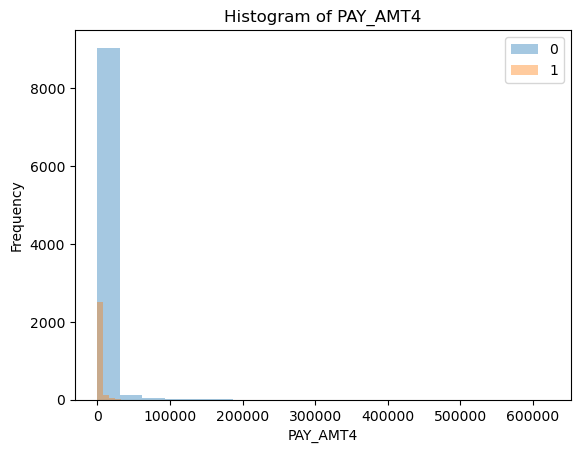

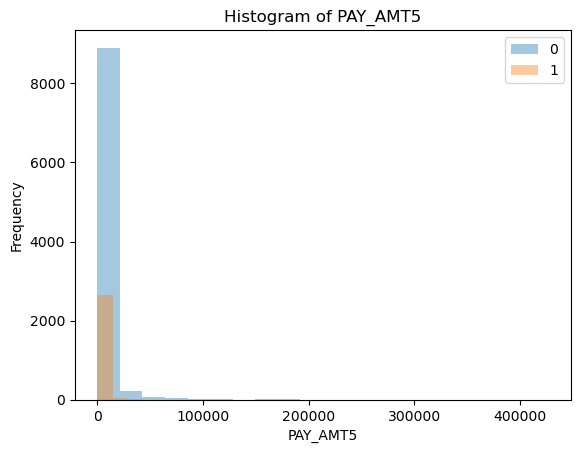

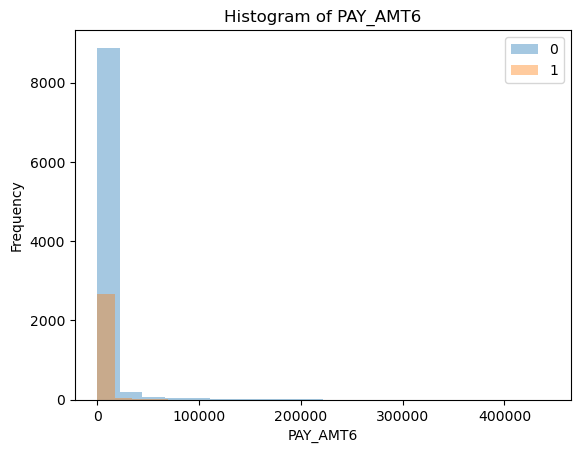

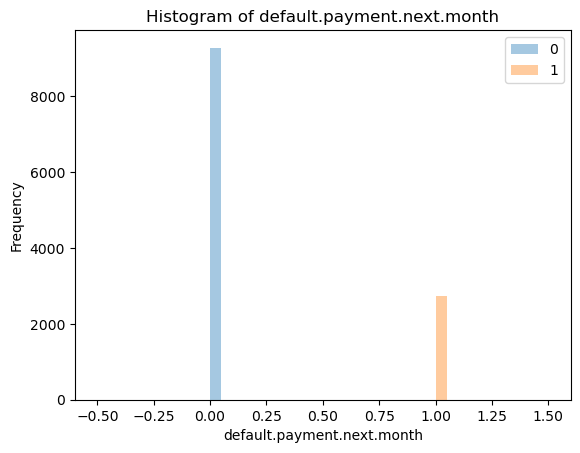

In [7]:
vis = train_df.columns.tolist()
for v in vis:
    ax = train_df.groupby("default.payment.next.month")[v].plot.hist(bins=20, alpha=0.4, legend=True)
    plt.xlabel(v)
    plt.title("Histogram of " + v)
    plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Preprocessing and transformations <a name="5"></a>
<hr>

_points: 10_

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

First I identify different features

In [8]:
numeric_features = [col for col in train_df.columns if col.startswith("PAY_AMT") or col.startswith("BILL_AMT") or col=="LIMIT_BAL" or col == "AGE"]
categorical_features = ["MARRIAGE"]
binary_features = ["SEX"]
ordinal_features = [col for col in train_df.columns if (col.startswith("PAY_") and not col.startswith("PAY_AMT")) or col == "EDUCATION"]
print("numeric_features:", numeric_features, 
      "categorical_features:", categorical_features, 
      "binary_features:", binary_features, 
      "ordinal_features:", ordinal_features)


numeric_features: ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'] categorical_features: ['MARRIAGE'] binary_features: ['SEX'] ordinal_features: ['EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [9]:
ordering_list=[]
for col in ordinal_features:
    list=train_df[col].unique()
    sorted_list = sorted(list)
    ordering_list.append(sorted_list)
# To get the ordering list of every ordinal variables

numeric_transformer = StandardScaler()

ordinal_transformer = OrdinalEncoder(categories=ordering_list, dtype=int)

categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
   
binary_transformer =  OneHotEncoder(drop="if_binary", dtype=int)

#make column transformer
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer, ordinal_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
)
ordering_list

[[0, 1, 2, 3, 4, 5, 6],
 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8],
 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8],
 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]]

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Baseline model <a name="6"></a>
<hr>

_points: 2_

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Use Dummy classifier as baseline model. As the result below, most people pay the bill in time_

In [10]:
X_train = None
y_train = None
X_test = None
y_test = None

X_train = train_df.drop(columns=["default.payment.next.month"])
y_train = train_df["default.payment.next.month"]
train_df["default.payment.next.month"].value_counts(normalize=True)

X_test = test_df.drop(columns=["default.payment.next.month"])
y_test = test_df["default.payment.next.month"]

dummy_df = None 

dummy = DummyClassifier(strategy="most_frequent")
scores = cross_validate(dummy, X_train, y_train, return_train_score=True)
dummy_df = pd.DataFrame(scores)
dummy_df

scoring = ["accuracy", "f1", "recall", "precision", "roc_auc", "average_precision"]
bal_scores = cross_validate(dummy, X_train, y_train, scoring=scoring)
bal=pd.DataFrame(bal_scores)
bal

C:\Users\yujie\.conda\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yujie\.conda\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yujie\.conda\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yujie\.conda\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:

,fit_time,score_time,test_accuracy,test_f1,test_recall,test_precision,test_roc_auc,test_average_precision
0,0.0,0.046881,0.773333,0.0,0.0,0.0,0.5,0.226667
1,0.0,0.031262,0.772917,0.0,0.0,0.0,0.5,0.227083
2,0.0,0.031294,0.772917,0.0,0.0,0.0,0.5,0.227083
3,0.0,0.047176,0.772917,0.0,0.0,0.0,0.5,0.227083
4,0.0,0.047035,0.772917,0.0,0.0,0.0,0.5,0.227083


<br><br>

<!-- BEGIN QUESTION -->

## 6. Linear models <a name="7"></a>
<hr>

_points 10_

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [11]:
pipe_lr = make_pipeline(
    preprocessor, LogisticRegression(class_weight="balanced", max_iter=500)
)

pipe_lr.fit(X_train, y_train)
scoring = ["accuracy", "f1", "recall", "precision"]
bal_scores = cross_validate(pipe_lr, X_train, y_train, scoring=scoring, return_train_score=True)
pd.DataFrame(bal_scores).mean()

fit_time           0.405867
score_time         0.046084
test_accuracy      0.701333
train_accuracy     0.703313
test_f1            0.493533
train_f1           0.497143
test_recall        0.641326
train_recall       0.645924
test_precision     0.401132
train_precision    0.404109
dtype: float64

In [12]:
param_grid = {
    "logisticregression__C": np.logspace(-3, 3, 10),    
}
random_search = RandomizedSearchCV(pipe_lr, param_distributions=param_grid, n_iter=100, n_jobs=-1, return_train_score=True, scoring='f1')
random_search.fit(X_train, y_train)
relevant = [
    "mean_test_score",
    "std_test_score",
    "mean_train_score",	
    "std_train_score",
    "param_logisticregression__C", 
    "mean_fit_time",
    "rank_test_score",
]
pd.DataFrame(random_search.cv_results_)[relevant].set_index("rank_test_score").sort_index().T

C:\Users\yujie\.conda\envs\cpsc330\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


rank_test_score,1,2,3,4,5,6,7,8,9,10
mean_test_score,0.494737,0.494536,0.494531,0.494453,0.493394,0.493045,0.49291,0.49283,0.492759,0.483274
std_test_score,0.022207,0.020635,0.021561,0.021664,0.021616,0.021871,0.02196,0.021859,0.021858,0.02178
mean_train_score,0.499536,0.496646,0.497668,0.498402,0.497128,0.496758,0.496987,0.496935,0.496811,0.485397
std_train_score,0.007085,0.005669,0.007371,0.007369,0.007609,0.007535,0.007525,0.007596,0.007571,0.006756
param_logisticregression__C,0.021544,0.004642,0.464159,0.1,2.154435,46.415888,1000.0,10.0,215.443469,0.001
mean_fit_time,0.41786,0.339053,0.656944,0.576357,0.841007,0.527722,0.461429,0.503186,0.539021,0.227785


_This model has consistent performance in different folds when doing cross-validation, but this model has low performance on spotting the class of default payment_

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Different models <a name="8"></a>
<hr>

_points: 12_

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_7
    
</div>

1. The fitting time of SVM RBF is very long compared with K-nn and random forests. And K-nn has incredible short fitting time.
2. The random forests is overfitting with the default parameter.

In [21]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = make_pipeline(
    preprocessor,
    RandomForestClassifier(
        n_jobs=-1,
        random_state=123,
    ),
)
results = cross_validate(
    pipe_rf, X_train, y_train, return_train_score=True, scoring='f1'
)
pd.DataFrame(results)

,fit_time,score_time,test_score,train_score
0,2.023516,0.078122,0.478673,0.998852
1,1.640128,0.078134,0.524404,0.998852
2,1.504936,0.093509,0.488839,0.999081
3,1.509532,0.070347,0.460094,0.999312
4,1.408683,0.062784,0.494869,0.999311


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
pipe_knn = make_pipeline(
    preprocessor,
    knn
)
scores = cross_validate(pipe_knn, X_train, y_train, return_train_score=True,scoring='f1')
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.046863,0.578637,0.790417,0.842812
1,0.047323,0.125429,0.800417,0.843958
2,0.052823,0.124995,0.790833,0.841354
3,0.046878,0.124221,0.801250,0.843750
4,0.046869,0.125166,0.793333,0.845729


In [15]:
from sklearn.svm import SVC
svm = SVC()
pipe_svm = make_pipeline(
    preprocessor,
    svm
)
scores = cross_validate(pipe_svm, X_train, y_train, return_train_score=True,scoring='f1')
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,5.953743,2.235651,0.815417,0.824583
1,5.971855,2.642242,0.826250,0.822187
2,6.441920,2.292594,0.819167,0.823229
3,5.785635,2.196203,0.817083,0.824479
4,8.739813,2.748860,0.813333,0.825417


<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Hyperparameter optimization <a name="10"></a>
<hr>

_points: 10_

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Type your answer here, replacing this text._

In [19]:
param_dist_knn = {
    'kneighborsclassifier__n_neighbors': np.arange(1, 50, 5),
}

random_search_knn = RandomizedSearchCV(pipe_knn, param_distributions=param_dist_knn, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search_knn.fit(X_train, y_train)

param_dist_rf = {
    'randomforestclassifier__n_estimators': np.arange(100, 1000, 100),
    'randomforestclassifier__max_depth': np.arange(1, 20, 2),
}

random_search_rf = RandomizedSearchCV(pipe_rf, param_distributions=param_dist_rf, n_iter=100, n_jobs=-1, return_train_score=True, scoring='f1')
random_search_rf.fit(X_train, y_train)

param_dist_svm = {
    'svc__C': [0.001, 0.01, 0.1, 1.0, 10, 100],
    'svc__gamma': np.linspace(2, 3, 6),
}

random_search_svm = RandomizedSearchCV(pipe_svm, param_distributions=param_dist_svm, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search_svm.fit(X_train, y_train)




C:\Users\yujie\.conda\envs\cpsc330\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\yujie\.conda\envs\cpsc330\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\yujie\.conda\envs\cpsc330\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 36 candidates, totalling 180 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6']),
                                                                              ('ordinalencoder',
                                                                               OrdinalEncoder(categories=[[0,
                                                                                                           1,
                                                                                                           2,
                                                                                                           3...
                                                                                'PAY_6']),
                                                                              ('onehotencoder-1',
                                                                               OneHotEncoder(drop='if_binary',
                                                                                             dtype=<class 'int'>),
                                                                               ['SEX']),
                                                                              ('onehotencoder-2',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['MARRIAGE'])])),
                                             ('svc', SVC())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'svc__C': [0.001, 0.01, 0.1, 1.0, 10,
                                                   100],
                                        'svc__gamma': array([2. , 2.2, 2.4, 2.6, 2.8, 3. ])},
                   random_state=42, verbose=1)

In [20]:

# Extract best test scores
best_test_score_knn = random_search_knn.best_score_
best_test_score_svm = random_search_svm.best_score_
best_test_score_rf = random_search_rf.best_score_

# Create a DataFrame to display these scores
results_df = pd.DataFrame({
    'Model': ['K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest'],
    'Best Test Score': [best_test_score_knn, best_test_score_svm, best_test_score_rf]
})

# Display the DataFrame
print(results_df)

                    Model  Best Test Score
0     K-Nearest Neighbors         0.812917
1  Support Vector Machine         0.781000
2           Random Forest         0.497228


<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Results on the test set <a name="12"></a>
<hr>

_points: 10_

**Your tasks:**

1. Try your best performing model on the test data: report and explain test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Summary of results <a name="13"></a>
<hr>

_points 12_

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table (printed `DataFrame`) summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using [PrairieLearn](https://ca.prairielearn.com/pl/course_instance/6697). Don't forget to rename your file `hw4_sol.ipynb`.

This was a tricky one but you did it!

![](img/eva-well-done.png)